# numpyの導入

## 学ぶこと

- Numpy配列の作り方
- Numpy配列のデータ型
- データ型のキャスト


## NumPyとは

## NumPy配列の初期化

In [1]:
import numpy as np




In [2]:
d = list(range(5))
print(d) # Pythonのリスト

num_array = np.array(d)
print(num_array) # numpyの配列

[0, 1, 2, 3, 4]
[0 1 2 3 4]


## NumPy配列のインデックスによるアクセス



In [3]:
x = np.ones(5)
print(x)

[1. 1. 1. 1. 1.]


In [4]:
x[2] = 8
x

array([1., 1., 8., 1., 1.])

スライスを使った直接の代入も可能である．


In [5]:
x[:2] = 10
x

array([10., 10.,  8.,  1.,  1.])

リストのスライスを使った代入は，要素数を変える**黒魔術**であることに注意．

基本的には使わないこと. 

In [6]:
x = list(range(5))
x[1:4] = [-1, -1]
x

[0, -1, -1, 4]

numpyの配列はインプレイスな演算もサポートしている. 

In [7]:
x = np.arange(5)
x[:4] += 10
x[:2] *= 10
x

array([100, 110,  12,  13,   4])

## NumPy配列の計算

In [8]:
# 直接関数を適用することが可能
np.exp(np.arange(5))

array([ 1.        ,  2.71828183,  7.3890561 , 20.08553692, 54.59815003])

## ベストプラクティス

上記のようにNumPy配列はループを使わない処理が可能である．
数値演算を高速化する場合には，ループ（ピュアなPython）に依存しないようにすることが重要. 


In [9]:
from mypy.mymodule import TimeExecute

In [10]:
x = list(range(int(1e7)))
with TimeExecute():
    for i in range(len(x)):
        x[i] *= 2
    

1,260.662 [msec]


In [11]:
x = list(range(int(1e7)))
with TimeExecute():
    x * 2

262.328 [msec]


## NumPy配列を簡単に呼び出す

よく使うのはコレらしい. 

- np.arange
- np.ones
- np.zeros
- np.ones_like
- np.zeros_like
- np.linspace
- np.random.rand
- np.random.randn
- np.full
- np.empty
- np.concatenate



In [12]:
a = np.arange(2)
b = np.arange(3, 5)
np.concatenate([a, b])

array([0, 1, 3, 4])

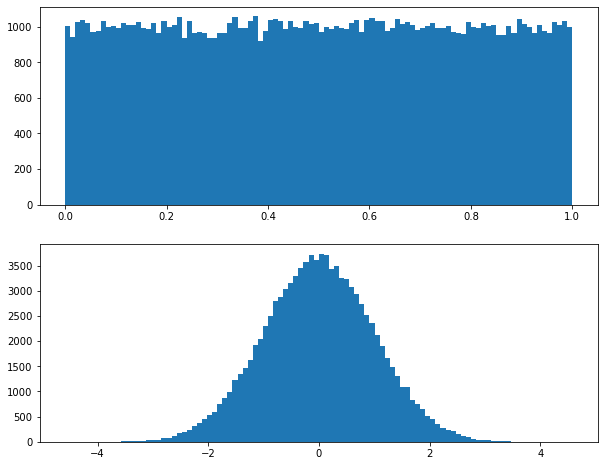

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize = (10, 8))
ax  = fig.add_subplot(2, 1, 1)
ax.hist(np.random.rand(100000), bins = 100)
ax  = fig.add_subplot(2, 1, 2)
ax.hist(np.random.randn(100000), bins = 100)
plt.show()

In [14]:
np.full((3, 2), [3, 2])

array([[3, 2],
       [3, 2],
       [3, 2]])

In [15]:
# すべｔ同じ要素の時にもfullを使う
# np.ones(N) * aなどよりも早い
np.full((10,), 5)

array([5, 5, 5, 5, 5, 5, 5, 5, 5, 5])

In [16]:
# 領域だけ確保の場合にもnp.zero等を使うより関数を使う. 
np.empty((3, 2))

array([[17.2, 17.2],
       [17.2, 17.2],
       [17.2, 24.2]])

## データ型


In [17]:
# データ型ごとのバイト数を確認
dtypes = [np.uint8, np.int32, np.float64, np.object, np.dtype("U10"), np.bool]
for dt in dtypes:
    x = np.ones(3, dtype = dt).tostring()
    print(dt, len(x) / 3)

<class 'numpy.uint8'> 1.0
<class 'numpy.int32'> 4.0
<class 'numpy.float64'> 8.0
<class 'object'> 8.0
<U10 40.0
<class 'bool'> 1.0


## ブーリアンマスク

NumPyの配列のスライスは，インデックスだけでなく，ブール型でも可能である. 


In [18]:
x = np.arange(5)
is_even = x % 2 == 0
x[is_even] += 10
x

array([10,  1, 12,  3, 14])

## キャスト

**astype**メソッドを使う. 


In [19]:
a = np.arange(10, dtype = np.int32)
a.astype(np.uint8)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [20]:
a.astype(np.dtype("U10"))

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype='<U10')

In [21]:
np.array(["10"]).astype(np.int32)

array([10])

## 演習問題

### question 01

In [22]:

import numpy as np

np.ones((3,))

array([1., 1., 1.])

In [23]:
np.zeros((7,))

array([0., 0., 0., 0., 0., 0., 0.])

### question 02

In [24]:
a = np.ones((3, ), dtype = np.int32)
print(a, a.dtype)

[1 1 1] int32


### question 03


In [25]:
x = np.zeros(5, dtype = np.int32)
x[len(x) // 2] += 1
x

array([0, 0, 1, 0, 0])

### question 04

In [26]:
x = np.empty(10, dtype = np.int32)
is_even = np.arange(len(x)) % 2 == 0
x[is_even] = 0
x[np.logical_not(is_even)] = 1
x

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1])

### question 06

In [27]:
N   = 100
ret = np.arange(1, N + 1, dtype = np.object)
is_fizz = ret % 3 == 0
is_buzz = ret % 5 == 0
is_fizz_buzz = np.logical_and(is_fizz, is_buzz)
for v, l in zip(["fizz", "buzz", "fizz_buzz"], [is_fizz, is_buzz, is_fizz_buzz]):
    ret[l] = v
ret

array([1, 2, 'fizz', 4, 'buzz', 'fizz', 7, 8, 'fizz', 'buzz', 11, 'fizz',
       13, 14, 'fizz_buzz', 16, 17, 'fizz', 19, 'buzz', 'fizz', 22, 23,
       'fizz', 'buzz', 26, 'fizz', 28, 29, 'fizz_buzz', 31, 32, 'fizz',
       34, 'buzz', 'fizz', 37, 38, 'fizz', 'buzz', 41, 'fizz', 43, 44,
       'fizz_buzz', 46, 47, 'fizz', 49, 'buzz', 'fizz', 52, 53, 'fizz',
       'buzz', 56, 'fizz', 58, 59, 'fizz_buzz', 61, 62, 'fizz', 64,
       'buzz', 'fizz', 67, 68, 'fizz', 'buzz', 71, 'fizz', 73, 74,
       'fizz_buzz', 76, 77, 'fizz', 79, 'buzz', 'fizz', 82, 83, 'fizz',
       'buzz', 86, 'fizz', 88, 89, 'fizz_buzz', 91, 92, 'fizz', 94,
       'buzz', 'fizz', 97, 98, 'fizz', 'buzz'], dtype=object)

### question 07

In [28]:
N  = 100
ret = np.full((N + 1), "", dtype = np.object)
ret[2::3] += "fizz"
ret[4::5] += "buzz"
ret[ret == ""] = (1 + np.where(ret == "")[0]).astype(np.object)
ret

array([1, 2, 'fizz', 4, 'buzz', 'fizz', 7, 8, 'fizz', 'buzz', 11, 'fizz',
       13, 14, 'fizzbuzz', 16, 17, 'fizz', 19, 'buzz', 'fizz', 22, 23,
       'fizz', 'buzz', 26, 'fizz', 28, 29, 'fizzbuzz', 31, 32, 'fizz', 34,
       'buzz', 'fizz', 37, 38, 'fizz', 'buzz', 41, 'fizz', 43, 44,
       'fizzbuzz', 46, 47, 'fizz', 49, 'buzz', 'fizz', 52, 53, 'fizz',
       'buzz', 56, 'fizz', 58, 59, 'fizzbuzz', 61, 62, 'fizz', 64, 'buzz',
       'fizz', 67, 68, 'fizz', 'buzz', 71, 'fizz', 73, 74, 'fizzbuzz', 76,
       77, 'fizz', 79, 'buzz', 'fizz', 82, 83, 'fizz', 'buzz', 86, 'fizz',
       88, 89, 'fizzbuzz', 91, 92, 'fizz', 94, 'buzz', 'fizz', 97, 98,
       'fizz', 'buzz', 101], dtype=object)

### question 08


In [29]:
import re
reg = re.compile("3")
N   = 100
ret = np.arange(1, N + 1, dtype = np.object)
ret[2::3] = "あほ"
for i in range(N):
    if reg.search(str(ret[i])):
        ret[i] = "あほ"

ret

array([1, 2, 'あほ', 4, 5, 'あほ', 7, 8, 'あほ', 10, 11, 'あほ', 'あほ', 14, 'あほ',
       16, 17, 'あほ', 19, 20, 'あほ', 22, 'あほ', 'あほ', 25, 26, 'あほ', 28, 29,
       'あほ', 'あほ', 'あほ', 'あほ', 'あほ', 'あほ', 'あほ', 'あほ', 'あほ', 'あほ', 40, 41,
       'あほ', 'あほ', 44, 'あほ', 46, 47, 'あほ', 49, 50, 'あほ', 52, 'あほ', 'あほ',
       55, 56, 'あほ', 58, 59, 'あほ', 61, 62, 'あほ', 64, 65, 'あほ', 67, 68,
       'あほ', 70, 71, 'あほ', 'あほ', 74, 'あほ', 76, 77, 'あほ', 79, 80, 'あほ', 82,
       'あほ', 'あほ', 85, 86, 'あほ', 88, 89, 'あほ', 91, 92, 'あほ', 94, 95, 'あほ',
       97, 98, 'あほ', 100], dtype=object)

### question 09

In [38]:
N = 200
x = np.zeros((N, ), dtype = np.int32)
y = np.arange(np.floor(np.sqrt(N)).astype(np.int)) ** 2
x[y] = y
x

array([  0,   1,   0,   0,   4,   0,   0,   0,   0,   9,   0,   0,   0,
         0,   0,   0,  16,   0,   0,   0,   0,   0,   0,   0,   0,  25,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  36,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  49,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  64,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,  81,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0, 100,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0, 121,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0, 144,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
       169,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

### question 10

In [43]:
velocity_km_per_m = (65 - 15) / 60
x_seq = 15 + velocity_km_per_m * np.arange(61)
np.round(x_seq, 2)

array([15.  , 15.83, 16.67, 17.5 , 18.33, 19.17, 20.  , 20.83, 21.67,
       22.5 , 23.33, 24.17, 25.  , 25.83, 26.67, 27.5 , 28.33, 29.17,
       30.  , 30.83, 31.67, 32.5 , 33.33, 34.17, 35.  , 35.83, 36.67,
       37.5 , 38.33, 39.17, 40.  , 40.83, 41.67, 42.5 , 43.33, 44.17,
       45.  , 45.83, 46.67, 47.5 , 48.33, 49.17, 50.  , 50.83, 51.67,
       52.5 , 53.33, 54.17, 55.  , 55.83, 56.67, 57.5 , 58.33, 59.17,
       60.  , 60.83, 61.67, 62.5 , 63.33, 64.17, 65.  ])

### question 11

In [41]:

x = np.arange(10)

x ** x

array([        1,         1,         4,        27,       256,      3125,
           46656,    823543,  16777216, 387420489], dtype=int32)

### question 12

In [45]:
alpha_arr = np.linspace(0, 2 * np.pi, 50)
beta_arr  = np.arange(50)
x = np.sin(alpha_arr + beta_arr)
y = np.sin(alpha_arr) * np.cos(beta_arr) + np.cos(alpha_arr) * np.sin(beta_arr)
x[:10], y[:10]

(array([ 0.        ,  0.90365484,  0.77400118, -0.24070502, -0.98017057,
        -0.59883364,  0.46725577,  0.99904896,  0.38845266, -0.66633031]),
 array([ 0.        ,  0.90365484,  0.77400118, -0.24070502, -0.98017057,
        -0.59883364,  0.46725577,  0.99904896,  0.38845266, -0.66633031]))

In [46]:
for a, b in zip(x, y):
    if not np.isclose(a, b):
        print("x != y")


### question 13

In [50]:
# 1円未満は切り捨て
return_fee_rate = .35
# 1000円未満は四捨五入
return_coupon_rate = .15

fee_arr = np.arange(1000, 30001, 500)
fee_arr

array([ 1000,  1500,  2000,  2500,  3000,  3500,  4000,  4500,  5000,
        5500,  6000,  6500,  7000,  7500,  8000,  8500,  9000,  9500,
       10000, 10500, 11000, 11500, 12000, 12500, 13000, 13500, 14000,
       14500, 15000, 15500, 16000, 16500, 17000, 17500, 18000, 18500,
       19000, 19500, 20000, 20500, 21000, 21500, 22000, 22500, 23000,
       23500, 24000, 24500, 25000, 25500, 26000, 26500, 27000, 27500,
       28000, 28500, 29000, 29500, 30000])

In [52]:
apparent_fee = fee_arr - np.floor(fee_arr * return_fee_rate).astype(np.int)
apparent_fee

array([  650,   975,  1300,  1625,  1950,  2275,  2600,  2925,  3250,
        3576,  3900,  4225,  4550,  4875,  5200,  5525,  5850,  6175,
        6500,  6826,  7151,  7476,  7800,  8125,  8450,  8775,  9100,
        9425,  9750, 10075, 10400, 10725, 11050, 11375, 11700, 12025,
       12350, 12675, 13000, 13326, 13651, 13976, 14301, 14626, 14951,
       15275, 15600, 15925, 16250, 16575, 16900, 17225, 17550, 17875,
       18200, 18525, 18850, 19175, 19500])

In [82]:
 x = fee_arr * return_coupon_rate
 z = (x // 1000).astype(np.int)
 y = np.round(1 + x - z * 1000, -3)
 coupen = 1000 * z + y
 coupen


array([   0.,    0.,    0.,    0.,    0., 1000., 1000., 1000., 1000.,
       1000., 1000., 1000., 1000., 1000., 1000., 1000., 1000., 1000.,
       2000., 2000., 2000., 2000., 2000., 2000., 2000., 2000., 2000.,
       2000., 2000., 2000., 2000., 2000., 3000., 3000., 3000., 3000.,
       3000., 3000., 3000., 3000., 3000., 3000., 3000., 3000., 3000.,
       4000., 4000., 4000., 4000., 4000., 4000., 4000., 4000., 4000.,
       4000., 4000., 4000., 4000., 5000.])

In [83]:
apparent_fee - coupen

array([  650.,   975.,  1300.,  1625.,  1950.,  1275.,  1600.,  1925.,
        2250.,  2576.,  2900.,  3225.,  3550.,  3875.,  4200.,  4525.,
        4850.,  5175.,  4500.,  4826.,  5151.,  5476.,  5800.,  6125.,
        6450.,  6775.,  7100.,  7425.,  7750.,  8075.,  8400.,  8725.,
        8050.,  8375.,  8700.,  9025.,  9350.,  9675., 10000., 10326.,
       10651., 10976., 11301., 11626., 11951., 11275., 11600., 11925.,
       12250., 12575., 12900., 13225., 13550., 13875., 14200., 14525.,
       14850., 15175., 14500.])

### question 14

In [99]:
a = np.linspace(-1, 1, 9)

In [98]:
for x, b, c, d, e in zip(a, np.floor(a), np.ceil(a), np.round(a), a.astype(np.int)):
    print (f"{x:>5.2f}, {b:>5.2f}, {c:>5.2f}, {d:>5.2f}, {e:>5.2f}")

-1.00, -1.00, -1.00, -1.00, -1.00
-0.75, -1.00, -0.00, -1.00,  0.00
-0.50, -1.00, -0.00, -0.00,  0.00
-0.25, -1.00, -0.00, -0.00,  0.00
 0.00,  0.00,  0.00,  0.00,  0.00
 0.25,  0.00,  1.00,  0.00,  0.00
 0.50,  0.00,  1.00,  0.00,  0.00
 0.75,  0.00,  1.00,  1.00,  0.00
 1.00,  1.00,  1.00,  1.00,  1.00


### question 15

In [101]:
size = 10
for _ in range(5):
    r = np.random.randn(size)
    n_positive = np.sum(r >= 0)
    n_negative = size - n_positive
    print(f"p = {n_positive}, n = {n_negative}")

p = 5, n = 5
p = 4, n = 6
p = 5, n = 5
p = 5, n = 5
p = 5, n = 5


### question 16

In [105]:
x = np.arange(50)
y = x // 10
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4], dtype=int32)

In [106]:
for a in range(5):
    print(np.sum(y == a))

10
10
10
10
10


### question 17

In [107]:
x = np.array([0, 1, 2, 253, 254, 255], dtype = np.uint8)

In [108]:
x + 1

array([  1,   2,   3, 254, 255,   0], dtype=uint8)

In [109]:
x - 1

array([255,   0,   1, 252, 253, 254], dtype=uint8)

In [110]:
x * 2

array([  0,   2,   4, 250, 252, 254], dtype=uint8)

In [111]:
254 * 2 % 256

252

In [112]:
x / 2

array([  0. ,   0.5,   1. , 126.5, 127. , 127.5])

In [114]:
(x / 2).dtype

dtype('float64')

In [115]:
x // 2

array([  0,   0,   1, 126, 127, 127], dtype=uint8)

### question 18


In [117]:
# 任意の範囲で頭打ちのを作成するには
np.clip(np.arange(10), 3, 7)

array([3, 3, 3, 3, 4, 5, 6, 7, 7, 7])